**Description du projet**

Le but de ce projet est d'aider l'entreprise Academy à se développer dans l'international. Nous allons analyser les bases données afin de permettre à Academy de savoir quelle future potentielle clientèle faut-il atteindre, en se basant sur les informations de nos bases des données.

**Problématique**
- Quels sont les pays avec un fort potentiel de clients pour nos services ?
- Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
- Dans quels pays l'entreprise doit-elle opérer en priorité ?












**Etape 1 : Description des bases de données** 


In [190]:
#Importation des modules 
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None # default='warn'

La base EdStatsCountry décrit l'ensemble des pays , leurs régions , leurs niveau de revenues , l'année de la dernière recensement et d'autres variables

In [191]:
#importation de la base donnée
df_ed_stat_country = pd.read_csv("EdStatsCountry.csv")
#visualisation de la base de donnée de 5 premieres colonnes 
df_ed_stat_country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


Dimension de la base de donnée : EdStatsCountry

In [192]:
df_ed_stat_country.shape

(241, 32)

Fonction valeur manquante 

In [193]:
def valeur_manquante(data):
    nb_rows=data.shape[0]
    ret=pd.DataFrame(data.isna().sum(),columns=['nb_manquant'])
    ret['pourcentage']=(ret['nb_manquant']/nb_rows)*100
    return ret

In [194]:
valeur_manquante(df_ed_stat_country)

,nb_manquant,pourcentage
Country Code,0,0.000000
Short Name,0,0.000000
Table Name,0,0.000000
Long Name,0,0.000000
2-alpha code,3,1.244813
Currency Unit,26,10.788382
Special Notes,96,39.834025
Region,27,11.203320
Income Group,27,11.203320
WB-2 code,1,0.414938


Fonction qui détermine le nombre de valeur dupliqué

In [195]:
def detec_duplica(data):
    return data.duplicated().sum()

In [196]:
detec_duplica(df_ed_stat_country)

0

Description du type des colonnes de EdStatsCountry

In [197]:
df_ed_stat_country.dtypes

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

Description de la base de donnée EdStatData : 
la base de donnée nous descrit le résulat de chaque indicateur de 1970 à 2100 et par pays 

In [198]:
df_ed_stats_data = pd.read_csv("EdStatsData.csv")
df_ed_stats_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dimension de la base de donnée : EdStatsData

In [199]:
df_ed_stats_data.shape

(886930, 70)

In [200]:
valeur_manquante(df_ed_stats_data)

,nb_manquant,pourcentage
Country Name,0,0.000000
Country Code,0,0.000000
Indicator Name,0,0.000000
Indicator Code,0,0.000000
1970,814642,91.849639
...,...,...
2085,835494,94.200670
2090,835494,94.200670
2095,835494,94.200670
2100,835494,94.200670


In [201]:
detec_duplica(df_ed_stats_data)

0

Description du type des colonnes de EdStatsData

In [202]:
df_ed_stats_data.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64
Unnamed: 69       float64
Length: 70, dtype: object

la Base EdStatsSeries est un complément d'information que la base de donnée  EdStatsData dans lequel on décrit avec d'autres resources comme l'unité de mesure , la périodicité , les sources et bien d'autres comme ci-dessous

In [203]:
df_ed_stats_series = pd.read_csv("EdStatsSeries.csv")
df_ed_stats_series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dimension de la baseEdStatsSeries

In [204]:
df_ed_stats_series.shape

(3665, 21)

Description du type des colonnes EdStatsSeries

In [205]:
df_ed_stats_series.dtypes

Series Code                             object
Topic                                   object
Indicator Name                          object
Short definition                        object
Long definition                         object
Unit of measure                        float64
Periodicity                             object
Base Period                             object
Other notes                             object
Aggregation method                      object
Limitations and exceptions              object
Notes from original source             float64
General comments                        object
Source                                  object
Statistical concept and methodology     object
Development relevance                   object
Related source links                    object
Other web links                        float64
Related indicators                     float64
License Type                           float64
Unnamed: 20                            float64
dtype: object

In [206]:
valeur_manquante(df_ed_stats_series)

,nb_manquant,pourcentage
Series Code,0,0.000000
Topic,0,0.000000
Indicator Name,0,0.000000
Short definition,1509,41.173261
Long definition,0,0.000000
Unit of measure,3665,100.000000
Periodicity,3566,97.298772
Base Period,3351,91.432469
Other notes,3113,84.938608
Aggregation method,3618,98.717599


In [207]:
detec_duplica(df_ed_stats_series)

0

La Base EDStatsfootNote décrit l'ensemble des pays , leur code , l'année et une description

In [208]:
df_ed_stats_foot_notes = pd.read_csv("EdStatsFootNote.csv")
df_ed_stats_foot_notes.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


Dimension de la base EdStatsFootNote

In [209]:
df_ed_stats_foot_notes.shape

(643638, 5)

In [210]:
valeur_manquante(df_ed_stats_foot_notes)

,nb_manquant,pourcentage
CountryCode,0,0.0
SeriesCode,0,0.0
Year,0,0.0
DESCRIPTION,0,0.0
Unnamed: 4,643638,100.0


In [211]:
detec_duplica(df_ed_stats_foot_notes)

0

Description du type des colonnes de EdStatsFootNote

In [212]:
df_ed_stats_foot_notes.dtypes

CountryCode     object
SeriesCode      object
Year            object
DESCRIPTION     object
Unnamed: 4     float64
dtype: object

La base EdStatsCountry-Series est un complément d'information que la base de donnée  EdStatsCountry dans lequel on décrit avec d'autres resources le code pour chaque pays avec un numéro de serie par pays et une description

In [213]:
df_ed_stats_country_series = pd.read_csv("EdStatsCountry-Series.csv") 
df_ed_stats_country_series.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


Dimension de la base EdStatsCountry-Series

In [214]:
df_ed_stats_country_series.shape

(613, 4)

In [215]:
valeur_manquante(df_ed_stats_country_series)

,nb_manquant,pourcentage
CountryCode,0,0.0
SeriesCode,0,0.0
DESCRIPTION,0,0.0
Unnamed: 3,613,100.0


In [216]:
detec_duplica(df_ed_stats_country_series)

0

Description du type des colonnes de EdStatsCountry-Series

In [217]:
df_ed_stats_country_series.dtypes

CountryCode     object
SeriesCode      object
DESCRIPTION     object
Unnamed: 3     float64
dtype: object

**Etape 2 : Filtrage des Bases de données**
 

Nous nous concentrerons sur les bases EdStatsCountry et EdStatsData car elles semblent plus interresantes car nous avons les pays et le resultat de chaque indicateur qui est indispensable à notre étude.

Nous allons nous concentrer sur le filtrage des données pour se concentrer sur les études satistique les plus recentes >= 2010 avec la colonne 'Latest population census'



In [218]:
df_ed_stat_country_2010 = df_ed_stat_country[df_ed_stat_country['Latest population census'] >= '2010']
df_ed_stat_country_2010.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN
6,ARE,United Arab Emirates,United Arab Emirates,United Arab Emirates,AE,U.A.E. dirham,April 2013 database update: Based on data from...,Middle East & North Africa,High income: nonOECD,AE,...,General Data Dissemination System (GDDS),2010,NaN,NaN,NaN,2012,NaN,2011.0,2005,NaN
7,ARG,Argentina,Argentina,Argentine Republic,AR,Argentine peso,NaN,Latin America & Caribbean,Upper middle income,AR,...,Special Data Dissemination Standard (SDDS),2010,"Multiple Indicator Cluster Survey (MICS), 2011/12","Integrated household survey (IHS), 2012",Yes,2013,2002.0,2012.0,2000,NaN


On affiche l'ensemble des pays qui en resulte 

In [219]:
df_ed_stat_country_2010[['Short Name']]

,Short Name
0,Aruba
3,Albania
4,Andorra
6,United Arab Emirates
7,Argentina
...,...
235,Samoa
236,Kosovo
238,South Africa
239,Zambia


Jointure entre ed_stats_country et ed_stats_data pour avoir les valeurs de chaque indicateur par date 

In [220]:
df_merge = df_ed_stat_country_2010.merge(df_ed_stats_data, on="Country Code", how="inner")
df_merge.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dimension de df_merge

In [221]:
df_merge.shape

(509435, 101)

Recherche des indicateurs potentiellement intéressantes pour le besoin de notre étude :

- Démographie : population totale, par tranches d’âge 20-29 ans, voire autres tranches d’âge
- Niveau éducation :  nombre et taux étudiants dans le secondaire et tertiaire
- Déploiement internet : Taux utilisation internet
- Économique : PIB, PIB / habitant, niveau de revenu

In [222]:
choosen_idicators = df_merge['Indicator Name'].str.contains('GDP per capita |Internet users|Personal computers|population growth|Share of youth not in education, employment, or training, total|Percentage of population age 15-19 with no education|Percentage of population age 20-24 with no edu|Average years of total schooling, age 20-24, total|Average years of total schooling, age 15-19, total', case=False,na=False)

Creation d'une nouvelle base à partir des indicateurs choisis

In [223]:
df_merge_choosen = df_merge[choosen_idicators]
df_merge_choosen

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
242,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
381,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
388,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1244,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507066,ZWE,Zimbabwe,Zimbabwe,Republic of Zimbabwe,ZW,U.S. dollar,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,ZW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507145,ZWE,Zimbabwe,Zimbabwe,Republic of Zimbabwe,ZW,U.S. dollar,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,ZW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507854,ZWE,Zimbabwe,Zimbabwe,Republic of Zimbabwe,ZW,U.S. dollar,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,ZW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
508077,ZWE,Zimbabwe,Zimbabwe,Republic of Zimbabwe,ZW,U.S. dollar,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,ZW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Affichage de l'ensemble des codes indicateurs de la nouvelle base de donnée

In [224]:
print('{} indicateurs sont identifiés comme pertinents dans notre data frame {}.'.format(
    df_merge_choosen['Indicator Code'].unique().shape[0], "df_merge_choosen"))
print('La liste des indicateurs sélectionnés est la suivante :\n {}'.format(
    df_merge_choosen['Indicator Code'].unique()))

16 indicateurs sont identifiés comme pertinents dans notre data frame df_merge_choosen.
La liste des indicateurs sélectionnés est la suivante :
 ['BAR.SCHL.1519' 'BAR.SCHL.2024' 'BAR.NOED.1519.ZS' 'BAR.NOED.2024.ZS'
 'NY.GDP.PCAP.KD' 'NY.GDP.PCAP.CD' 'UIS.XUNIT.GDPCAP.2.FSGOV'
 'UIS.XUNIT.GDPCAP.4.FSGOV' 'SE.XPD.PRIM.PC.ZS' 'SE.XPD.SECO.PC.ZS'
 'SE.XPD.TERT.PC.ZS' 'UIS.XUNIT.GDPCAP.3.FSGOV' 'IT.NET.USER.P2'
 'IT.CMP.PCMP.P2' 'SP.POP.GROW' 'SL.UEM.NEET.ZS']


Création de df_merge_choosen_recent qui représente les codes et indicateurs en fonction de leur résultat de 2010 à 2020 

In [225]:
df_merge_choosen_recent=df_merge[choosen_idicators][['Indicator Code','Indicator Name',
                '2010', '2011', '2012', '2013', '2014','2015', '2016', '2017', '2020']]
df_merge_choosen_recent.reset_index(inplace=True,drop=True)
df_merge_choosen_recent

,Indicator Code,Indicator Name,2010,2011,2012,2013,2014,2015,2016,2017,2020
0,BAR.SCHL.1519,"Barro-Lee: Average years of total schooling, a...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.SCHL.2024,"Barro-Lee: Average years of total schooling, a...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.1519.ZS,Barro-Lee: Percentage of population age 15-19 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.2024.ZS,Barro-Lee: Percentage of population age 20-24 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NY.GDP.PCAP.KD,GDP per capita (constant 2005 US$),24271.940421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2219,UIS.XUNIT.GDPCAP.3.FSGOV,Government expenditure per upper secondary stu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2220,IT.NET.USER.P2,Internet users (per 100 people),6.400000,8.400000,12.000000,15.500000,16.364740,22.742818,23.119989,NaN,NaN
2221,IT.CMP.PCMP.P2,Personal computers (per 100 people),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2222,SP.POP.GROW,Population growth (annual %),1.976756,2.109672,2.228306,2.309366,2.344799,2.345643,2.336070,NaN,NaN


In [226]:
valeur_manquante(df_merge_choosen_recent)

,nb_manquant,pourcentage
Indicator Code,0,0.000000
Indicator Name,0,0.000000
2010,885,39.793165
2011,1297,58.318345
2012,1360,61.151079
2013,1398,62.859712
2014,1511,67.940647
2015,1633,73.426259
2016,1704,76.618705
2017,2224,100.000000


On contate que pour les indicateurs choisis l'année 2017 et 2020 représente 100% de valeur manquante donc elles sont inutiles.
Donc df_merge_choosen_recent_date représentera le nom et code indicateur de 2010 à 2016.

In [227]:
df_merge_choosen_recent_date=df_merge[choosen_idicators][['Indicator Code','Indicator Name',
                '2010', '2011', '2012', '2013', '2014','2015', '2016']].T
df_merge_choosen_recent_date

,242,244,381,388,1244,1245,1271,1276,1281,1286,...,507041,507046,507051,507056,507061,507066,507145,507854,508077,508715
Indicator Code,BAR.SCHL.1519,BAR.SCHL.2024,BAR.NOED.1519.ZS,BAR.NOED.2024.ZS,NY.GDP.PCAP.KD,NY.GDP.PCAP.CD,UIS.XUNIT.GDPCAP.2.FSGOV,UIS.XUNIT.GDPCAP.4.FSGOV,SE.XPD.PRIM.PC.ZS,SE.XPD.SECO.PC.ZS,...,UIS.XUNIT.GDPCAP.2.FSGOV,UIS.XUNIT.GDPCAP.4.FSGOV,SE.XPD.PRIM.PC.ZS,SE.XPD.SECO.PC.ZS,SE.XPD.TERT.PC.ZS,UIS.XUNIT.GDPCAP.3.FSGOV,IT.NET.USER.P2,IT.CMP.PCMP.P2,SP.POP.GROW,SL.UEM.NEET.ZS
Indicator Name,"Barro-Lee: Average years of total schooling, a...","Barro-Lee: Average years of total schooling, a...",Barro-Lee: Percentage of population age 15-19 ...,Barro-Lee: Percentage of population age 20-24 ...,GDP per capita (constant 2005 US$),GDP per capita (current US$),Government expenditure per lower secondary stu...,Government expenditure per post-secondary non-...,Government expenditure per primary student as ...,Government expenditure per secondary student a...,...,Government expenditure per lower secondary stu...,Government expenditure per post-secondary non-...,Government expenditure per primary student as ...,Government expenditure per secondary student a...,Government expenditure per tertiary student as...,Government expenditure per upper secondary stu...,Internet users (per 100 people),Personal computers (per 100 people),Population growth (annual %),"Share of youth not in education, employment, o..."
2010,NaN,NaN,NaN,NaN,24271.940421,24271.940421,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,66.495949,NaN,6.4,NaN,1.976756,NaN
2011,NaN,NaN,NaN,NaN,NaN,25324.720362,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.4,NaN,2.109672,NaN
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.966591,25.05241,...,NaN,NaN,21.491199,33.995522,255.829575,NaN,12.0,NaN,2.228306,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.22563,NaN,...,NaN,NaN,22.10948,35.129021,254.916733,NaN,15.5,NaN,2.309366,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.46488,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,16.36474,NaN,2.344799,NaN
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.742818,NaN,2.345643,NaN
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23.119989,NaN,2.33607,NaN


In [228]:
df_merge_choosen_recent_date.index

Index(['Indicator Code', 'Indicator Name', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016'],
      dtype='object')

In [229]:
ligne=[i for i in df_merge_choosen_recent_date.index]
ligne
ligne[0]=" "

In [230]:
df_merge_choosen_recent_date.index=ligne
df_merge_choosen_recent_date.index

Index([' ', 'Indicator Name', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016'],
      dtype='object')

In [231]:
df_merge_choosen_recent_date.columns=df_merge_choosen_recent_date.iloc[0]
df_merge_choosen_recent_date.columns

Index(['BAR.SCHL.1519', 'BAR.SCHL.2024', 'BAR.NOED.1519.ZS',
       'BAR.NOED.2024.ZS', 'NY.GDP.PCAP.KD', 'NY.GDP.PCAP.CD',
       'UIS.XUNIT.GDPCAP.2.FSGOV', 'UIS.XUNIT.GDPCAP.4.FSGOV',
       'SE.XPD.PRIM.PC.ZS', 'SE.XPD.SECO.PC.ZS',
       ...
       'UIS.XUNIT.GDPCAP.2.FSGOV', 'UIS.XUNIT.GDPCAP.4.FSGOV',
       'SE.XPD.PRIM.PC.ZS', 'SE.XPD.SECO.PC.ZS', 'SE.XPD.TERT.PC.ZS',
       'UIS.XUNIT.GDPCAP.3.FSGOV', 'IT.NET.USER.P2', 'IT.CMP.PCMP.P2',
       'SP.POP.GROW', 'SL.UEM.NEET.ZS'],
      dtype='object', name=' ', length=2224)

In [232]:
df_merge_choosen_recent_date=df_merge_choosen_recent_date.iloc[1:]
df_merge_choosen_recent_date

,BAR.SCHL.1519,BAR.SCHL.2024,BAR.NOED.1519.ZS,BAR.NOED.2024.ZS,NY.GDP.PCAP.KD,NY.GDP.PCAP.CD,UIS.XUNIT.GDPCAP.2.FSGOV,UIS.XUNIT.GDPCAP.4.FSGOV,SE.XPD.PRIM.PC.ZS,SE.XPD.SECO.PC.ZS,...,UIS.XUNIT.GDPCAP.2.FSGOV,UIS.XUNIT.GDPCAP.4.FSGOV,SE.XPD.PRIM.PC.ZS,SE.XPD.SECO.PC.ZS,SE.XPD.TERT.PC.ZS,UIS.XUNIT.GDPCAP.3.FSGOV,IT.NET.USER.P2,IT.CMP.PCMP.P2,SP.POP.GROW,SL.UEM.NEET.ZS
Indicator Name,"Barro-Lee: Average years of total schooling, a...","Barro-Lee: Average years of total schooling, a...",Barro-Lee: Percentage of population age 15-19 ...,Barro-Lee: Percentage of population age 20-24 ...,GDP per capita (constant 2005 US$),GDP per capita (current US$),Government expenditure per lower secondary stu...,Government expenditure per post-secondary non-...,Government expenditure per primary student as ...,Government expenditure per secondary student a...,...,Government expenditure per lower secondary stu...,Government expenditure per post-secondary non-...,Government expenditure per primary student as ...,Government expenditure per secondary student a...,Government expenditure per tertiary student as...,Government expenditure per upper secondary stu...,Internet users (per 100 people),Personal computers (per 100 people),Population growth (annual %),"Share of youth not in education, employment, o..."
2010,NaN,NaN,NaN,NaN,24271.940421,24271.940421,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,66.495949,NaN,6.4,NaN,1.976756,NaN
2011,NaN,NaN,NaN,NaN,NaN,25324.720362,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.4,NaN,2.109672,NaN
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.966591,25.05241,...,NaN,NaN,21.491199,33.995522,255.829575,NaN,12.0,NaN,2.228306,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.22563,NaN,...,NaN,NaN,22.10948,35.129021,254.916733,NaN,15.5,NaN,2.309366,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.46488,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,16.36474,NaN,2.344799,NaN
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.742818,NaN,2.345643,NaN
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23.119989,NaN,2.33607,NaN


In [233]:
def taux_remplissage(data):
    nb_rows=data.shape[0]
    ret=pd.DataFrame(data.isna().sum(),columns=['nb_manquant'])
    ret['pourcentage']=100-(ret['nb_manquant']/nb_rows)*100
    return ret

In [234]:
plot_data=taux_remplissage(df_merge_choosen_recent_date)
d=plot_data.copy()
plot_data["indicateur_name"]=d.index # ajout d'une colonne indicateur_name
plot_data.sort_values("pourcentage", ascending=False)

,nb_manquant,pourcentage,indicateur_name
,,,
NY.GDP.PCAP.CD,0,100.0,NY.GDP.PCAP.CD
NY.GDP.PCAP.KD,0,100.0,NY.GDP.PCAP.KD
IT.NET.USER.P2,0,100.0,IT.NET.USER.P2
NY.GDP.PCAP.CD,0,100.0,NY.GDP.PCAP.CD
NY.GDP.PCAP.KD,0,100.0,NY.GDP.PCAP.KD
...,...,...,...
BAR.SCHL.1519,7,12.5,BAR.SCHL.1519
BAR.SCHL.2024,7,12.5,BAR.SCHL.2024
BAR.NOED.1519.ZS,7,12.5,BAR.NOED.1519.ZS


Diagramme en baton du taux de remplissage par indicateurs 

[Text(0, 0, 'Barro-Lee: Average years of total schooling, age 15-19, total'),
 Text(1, 0, 'Barro-Lee: Average years of total schooling, age 20-24, total'),
 Text(2, 0, 'Barro-Lee: Percentage of population age 15-19 with no education'),
 Text(3, 0, 'Barro-Lee: Percentage of population age 20-24 with no education'),
 Text(4, 0, 'GDP per capita (constant 2005 US$)'),
 Text(5, 0, 'GDP per capita (current US$)'),
 Text(6, 0, 'Government expenditure per lower secondary student as % of GDP per capita (%)'),
 Text(7, 0, 'Government expenditure per post-secondary non-tertiary student as % of GDP per capita (%)'),
 Text(8, 0, 'Government expenditure per primary student as % of GDP per capita (%)'),
 Text(9, 0, 'Government expenditure per secondary student as % of GDP per capita (%)'),
 Text(10, 0, 'Government expenditure per tertiary student as % of GDP per capita (%)'),
 Text(11, 0, 'Government expenditure per upper secondary student as % of GDP per capita (%)'),
 Text(12, 0, 'Internet users (p

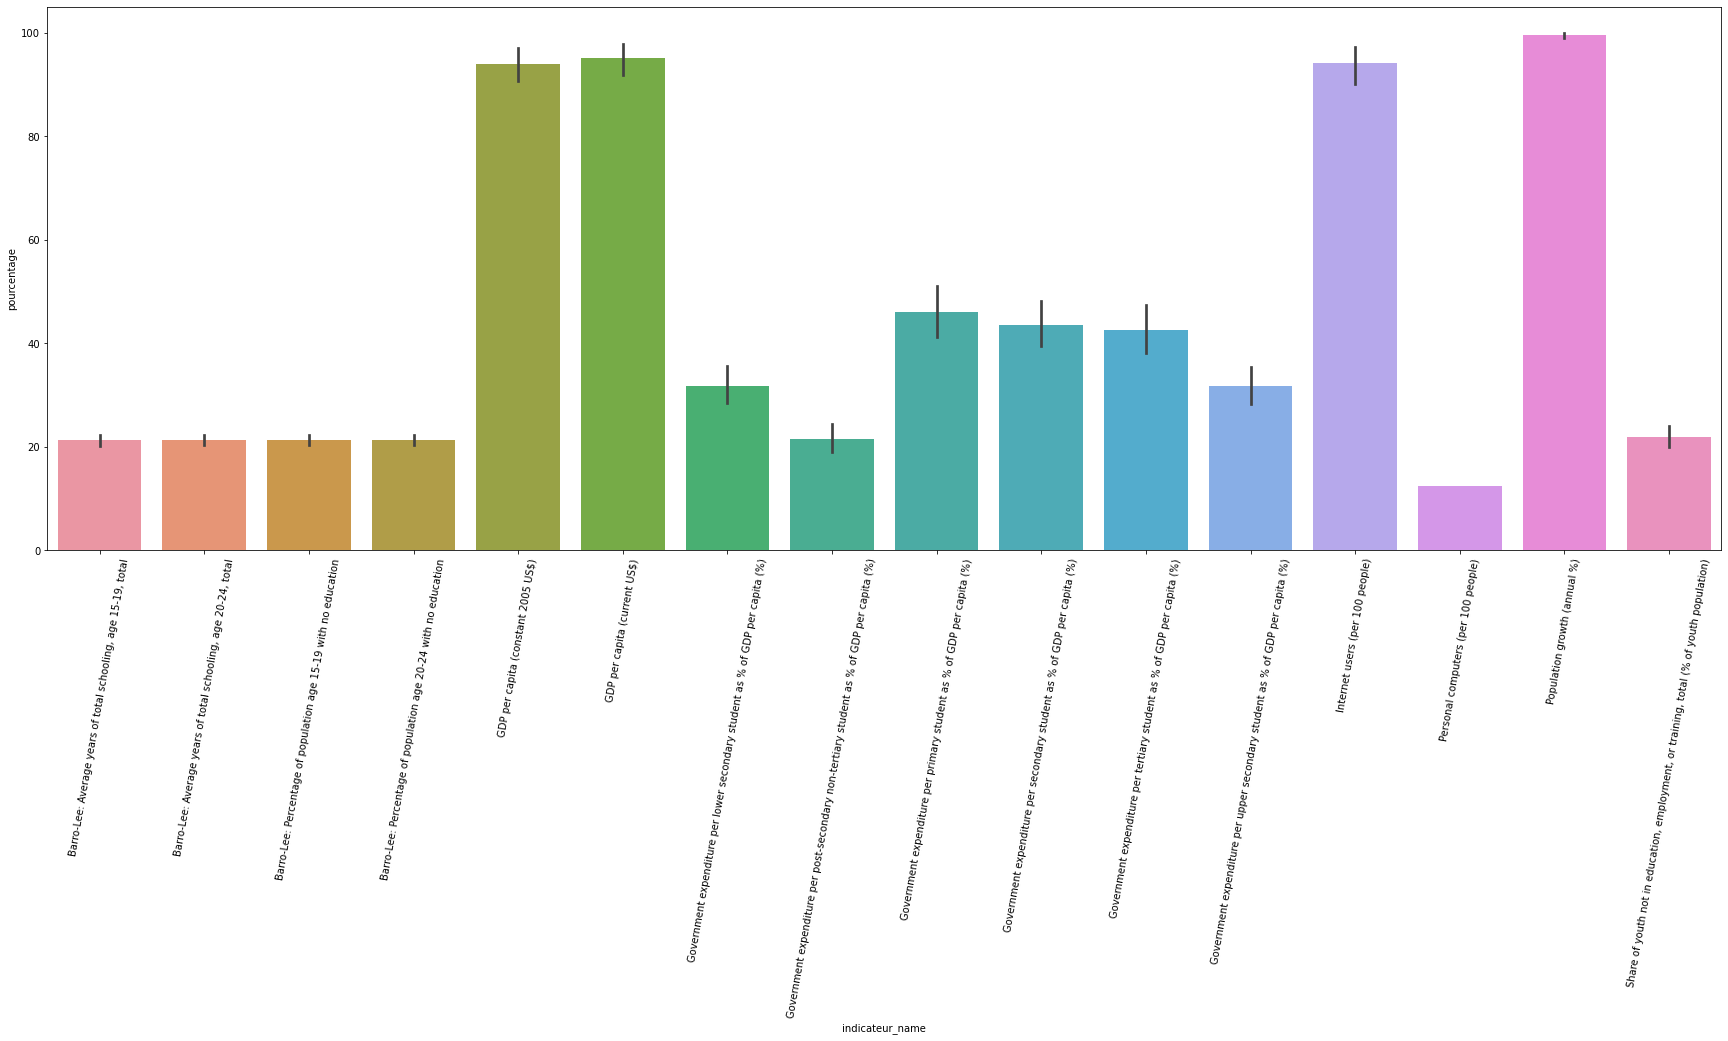

In [235]:
# diagramme en baton du taux de remplissage
from matplotlib.pyplot import figure
figure(figsize=(30, 10))
ax=sns.barplot(x="indicateur_name",y="pourcentage",data=plot_data)
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)#.set_title("Taux de remplissage")
ax.set_xticklabels(labels=df_merge_choosen['Indicator Name'].unique(), rotation=80)

Création d'une liste de 3 indicateurs à garder après l'observation du diagramme 

In [236]:
l_indicateurs_a_garder = [
    'GDP per capita (current US$)',
    'Internet users (per 100 people)',
    'Population growth (annual %)']  

Création d'une nouvelle base avec les indicateurs choisies

In [237]:
df_merge_ind = df_merge_choosen[ df_merge_choosen['Indicator Name'].isin(l_indicateurs_a_garder)]
df_merge_ind

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
1245,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1375,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2307,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4910,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5040,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503480,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504412,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507015,ZWE,Zimbabwe,Zimbabwe,Republic of Zimbabwe,ZW,U.S. dollar,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,ZW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507145,ZWE,Zimbabwe,Zimbabwe,Republic of Zimbabwe,ZW,U.S. dollar,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,ZW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Liste des nom des indicateurs

In [238]:
df_merge_ind['Indicator Name'].unique()

array(['GDP per capita (current US$)', 'Internet users (per 100 people)',
       'Population growth (annual %)'], dtype=object)

**Etape 3 : Analyse des 3 indicateurs**
 
 Nous allons étudier ces 3 indicateurs un par un afin de resortir les meilleurs pays 
 
 - Analyse de l'indicateur 'GDP per capita (current US$)'

In [239]:
# Création d'une data qui représente les résultat de 2010 à 2016 de 'GDP per capita (current US$)' en fonction des pays  
df_ind_GDP = df_merge_ind[df_merge_ind['Indicator Name'] == 'GDP per capita (current US$)'][['Country Code',
                '2010', '2011', '2012', '2013', '2014','2015', '2016']].T

df_ind_GDP.columns=df_ind_GDP.iloc[0]
df_ind_GDP.columns
df_ind_GDP=df_ind_GDP.iloc[1:]
df_ind_GDP

Country Code,ABW,ALB,AND,ARE,ARG,ARM,ASM,ATG,AUS,AUT,...,URY,USA,VCT,VEN,VIR,WSM,XKX,ZAF,ZMB,ZWE
2010,24271.940421,4094.358832,39736.354063,35049.148317,10276.260498,3218.381655,10352.822762,12174.697859,51874.080482,46858.043273,...,11938.212005,48373.878816,6231.770232,13545.205838,40831.114081,3453.434298,3283.211938,7361.75585,1463.213573,719.979517
2011,25324.720362,4437.178068,41098.766942,40462.312089,12726.908359,3526.978143,10375.994215,11931.204107,62245.100292,51374.958407,...,14166.499084,49790.665478,6183.676822,10741.576384,40072.222642,3942.051645,3712.613666,8058.833135,1644.619672,840.94988
2012,NaN,4247.614308,38391.080867,42112.235647,12969.707124,3684.80481,11660.329531,12517.557929,67677.634766,48567.695286,...,15092.068193,51450.122295,6338.117781,12755.000082,38898.123961,4234.640751,3586.15377,7548.255638,1734.930612,968.163871
2013,NaN,4413.081697,40619.711298,43350.642681,12976.636425,3843.591213,11589.853002,12194.608761,67792.303862,50719.388277,...,16881.205676,52787.026949,6597.211381,12237.224064,35937.634265,4219.024862,3877.031087,6880.445673,1850.793359,1026.388289
2014,NaN,4578.666728,42294.994727,44449.740349,12245.256449,3994.712355,11598.751736,12946.986936,62214.609121,51733.481917,...,16737.89827,54598.550689,6650.061128,15692.412878,34789.286743,4179.049934,4054.721339,6484.584983,1738.088202,1031.104616
2015,NaN,3934.895394,36038.267604,39101.74689,13467.102357,3617.935746,11865.963232,13659.147914,56554.038761,44255.583356,...,15524.842466,56469.008969,6899.691708,NaN,36350.821635,4149.411429,3574.481782,5773.483132,1313.889646,1033.415842
2016,NaN,4124.98239,36988.62203,37622.207456,12440.320982,3614.688357,11834.745229,14462.176279,49927.819509,44676.345835,...,15220.566025,57638.159088,7006.596196,NaN,NaN,4030.013144,3661.429847,5284.603604,1269.573537,1029.076649


Nombre et % de valeur manquante dans df_ind_GDP

In [240]:
valeur_manquante(df_ind_GDP).sort_values('nb_manquant', ascending=False)

,nb_manquant,pourcentage
Country Code,,
GIB,7,100.0
CYM,7,100.0
CHI,7,100.0
SXM,7,100.0
TCA,7,100.0
...,...,...
FIN,0,0.0
EST,0,0.0
ESP,0,0.0


Nous allons decider de faire une fonction qui permet de garder les pays qui ont un nombre de valeur manquante <=4 pour que le remplissage des valeurs soit précis

In [241]:
def Pays_garde(data):
    test=data.T
    l=valeur_manquante(data)
    test['nb_manquant']=l['nb_manquant']
    clean = test[test['nb_manquant'] <= 4]
    return clean 

In [242]:
df_ind_GDP_clean =Pays_garde(df_ind_GDP)
df_ind_GDP_clean.sort_values('nb_manquant', ascending=False)

,2010,2011,2012,2013,2014,2015,2016,nb_manquant
Country Code,,,,,,,,
PRI,26435.740187,27278.874895,27811.548147,28703.748347,NaN,NaN,NaN,3
BMU,88207.32756,85973.158416,85458.455508,85748.065414,NaN,NaN,NaN,3
VEN,13545.205838,10741.576384,12755.000082,12237.224064,15692.412878,NaN,NaN,2
CUB,5676.141403,6075.924306,6425.941119,6760.15344,7050.50199,7602.261218,NaN,1
LIE,141165.082857,158283.07626,149295.646044,173528.150454,179308.075616,168146.015281,NaN,1
...,...,...,...,...,...,...,...,...
FIN,46202.415163,50790.724145,47415.559871,49638.07713,49914.618642,42419.565567,43402.863264,0
EST,14638.604817,17454.843425,17421.890223,19072.238518,19949.581377,17155.874176,17727.492929,0
ESP,30736.627853,31835.288801,28563.859038,29211.773746,29623.164445,25787.928792,26639.740588,0


Supression de la colonne 'nb_manquant'

In [243]:
del df_ind_GDP_clean['nb_manquant']

In [244]:
df_ind_GDP_clean

,2010,2011,2012,2013,2014,2015,2016
Country Code,,,,,,,
ALB,4094.358832,4437.178068,4247.614308,4413.081697,4578.666728,3934.895394,4124.98239
AND,39736.354063,41098.766942,38391.080867,40619.711298,42294.994727,36038.267604,36988.62203
ARE,35049.148317,40462.312089,42112.235647,43350.642681,44449.740349,39101.74689,37622.207456
ARG,10276.260498,12726.908359,12969.707124,12976.636425,12245.256449,13467.102357,12440.320982
ARM,3218.381655,3526.978143,3684.80481,3843.591213,3994.712355,3617.935746,3614.688357
...,...,...,...,...,...,...,...
WSM,3453.434298,3942.051645,4234.640751,4219.024862,4179.049934,4149.411429,4030.013144
XKX,3283.211938,3712.613666,3586.15377,3877.031087,4054.721339,3574.481782,3661.429847
ZAF,7361.75585,8058.833135,7548.255638,6880.445673,6484.584983,5773.483132,5284.603604


Transposition de la Data df_ind_GDP_clean pour avoir les pays en colonne 

In [245]:
df_ind_GDP=df_ind_GDP_clean.T
df_ind_GDP

Country Code,ALB,AND,ARE,ARG,ARM,ASM,ATG,AUS,AUT,BEL,...,URY,USA,VCT,VEN,VIR,WSM,XKX,ZAF,ZMB,ZWE
2010,4094.358832,39736.354063,35049.148317,10276.260498,3218.381655,10352.822762,12174.697859,51874.080482,46858.043273,44380.176633,...,11938.212005,48373.878816,6231.770232,13545.205838,40831.114081,3453.434298,3283.211938,7361.75585,1463.213573,719.979517
2011,4437.178068,41098.766942,40462.312089,12726.908359,3526.978143,10375.994215,11931.204107,62245.100292,51374.958407,47702.811894,...,14166.499084,49790.665478,6183.676822,10741.576384,40072.222642,3942.051645,3712.613666,8058.833135,1644.619672,840.94988
2012,4247.614308,38391.080867,42112.235647,12969.707124,3684.80481,11660.329531,12517.557929,67677.634766,48567.695286,44740.583248,...,15092.068193,51450.122295,6338.117781,12755.000082,38898.123961,4234.640751,3586.15377,7548.255638,1734.930612,968.163871
2013,4413.081697,40619.711298,43350.642681,12976.636425,3843.591213,11589.853002,12194.608761,67792.303862,50719.388277,46582.66955,...,16881.205676,52787.026949,6597.211381,12237.224064,35937.634265,4219.024862,3877.031087,6880.445673,1850.793359,1026.388289
2014,4578.666728,42294.994727,44449.740349,12245.256449,3994.712355,11598.751736,12946.986936,62214.609121,51733.481917,47379.173917,...,16737.89827,54598.550689,6650.061128,15692.412878,34789.286743,4179.049934,4054.721339,6484.584983,1738.088202,1031.104616
2015,3934.895394,36038.267604,39101.74689,13467.102357,3617.935746,11865.963232,13659.147914,56554.038761,44255.583356,40375.388639,...,15524.842466,56469.008969,6899.691708,NaN,36350.821635,4149.411429,3574.481782,5773.483132,1313.889646,1033.415842
2016,4124.98239,36988.62203,37622.207456,12440.320982,3614.688357,11834.745229,14462.176279,49927.819509,44676.345835,41236.266589,...,15220.566025,57638.159088,7006.596196,NaN,NaN,4030.013144,3661.429847,5284.603604,1269.573537,1029.076649


Nous souhaitons remplir par la median les valeurs manquantes pour avoir une base de donnée la plus cohérente et complète que possible 

In [246]:
def remplissage_NAN (data):
    median=0
    for country in data.columns :
        median=data[country].median()
        data[country].fillna(median, inplace=True)
    return data

In [247]:
df_ind_GDP_remp=remplissage_NAN(df_ind_GDP)
df_ind_GDP_remp

Country Code,ALB,AND,ARE,ARG,ARM,ASM,ATG,AUS,AUT,BEL,...,URY,USA,VCT,VEN,VIR,WSM,XKX,ZAF,ZMB,ZWE
2010,4094.358832,39736.354063,35049.148317,10276.260498,3218.381655,10352.822762,12174.697859,51874.080482,46858.043273,44380.176633,...,11938.212005,48373.878816,6231.770232,13545.205838,40831.114081,3453.434298,3283.211938,7361.755850,1463.213573,719.979517
2011,4437.178068,41098.766942,40462.312089,12726.908359,3526.978143,10375.994215,11931.204107,62245.100292,51374.958407,47702.811894,...,14166.499084,49790.665478,6183.676822,10741.576384,40072.222642,3942.051645,3712.613666,8058.833135,1644.619672,840.949880
2012,4247.614308,38391.080867,42112.235647,12969.707124,3684.804810,11660.329531,12517.557929,67677.634766,48567.695286,44740.583248,...,15092.068193,51450.122295,6338.117781,12755.000082,38898.123961,4234.640751,3586.153770,7548.255638,1734.930612,968.163871
2013,4413.081697,40619.711298,43350.642681,12976.636425,3843.591213,11589.853002,12194.608761,67792.303862,50719.388277,46582.669550,...,16881.205676,52787.026949,6597.211381,12237.224064,35937.634265,4219.024862,3877.031087,6880.445673,1850.793359,1026.388289
2014,4578.666728,42294.994727,44449.740349,12245.256449,3994.712355,11598.751736,12946.986936,62214.609121,51733.481917,47379.173917,...,16737.898270,54598.550689,6650.061128,15692.412878,34789.286743,4179.049934,4054.721339,6484.584983,1738.088202,1031.104616
2015,3934.895394,36038.267604,39101.746890,13467.102357,3617.935746,11865.963232,13659.147914,56554.038761,44255.583356,40375.388639,...,15524.842466,56469.008969,6899.691708,12755.000082,36350.821635,4149.411429,3574.481782,5773.483132,1313.889646,1033.415842
2016,4124.982390,36988.622030,37622.207456,12440.320982,3614.688357,11834.745229,14462.176279,49927.819509,44676.345835,41236.266589,...,15220.566025,57638.159088,7006.596196,12755.000082,37624.472798,4030.013144,3661.429847,5284.603604,1269.573537,1029.076649


Fonction qui calcule la moyenne de l'indicateur de 2010 à 2016 pour chaque pays 

In [248]:
def Moyenne_data(data):
    ret=pd.DataFrame(data.mean(),columns=['Moyenne'])
    return ret

In [249]:
Moyenne_ind_GDP=Moyenne_data(df_ind_GDP_remp)
d=Moyenne_ind_GDP.copy()
Moyenne_ind_GDP["Country Code"]=d.index
Moyenne_ind_GDP

,Moyenne,Country Code
Country Code,,
ALB,4261.539631,ALB
AND,39309.685362,AND
ARE,40306.861918,ARE
ARG,12443.170313,ARG
ARM,3643.013183,ARM
...,...,...
WSM,4029.660866,WSM
XKX,3678.520490,XKX
ZAF,6770.280288,ZAF


Top 15 des pays en PIB par habitant

In [250]:
top_15_countries_GDP=Moyenne_ind_GDP.sort_values("Moyenne", ascending=False).head(15)
top_15_countries_GDP

,Moyenne,Country Code
Country Code,,
LIE,161848.656040,LIE
LUX,108906.609516,LUX
NOR,90834.593814,NOR
BMU,86138.406092,BMU
CHE,82883.450322,CHE
IMN,80477.112897,IMN
QAT,77949.653212,QAT
MAC,75424.883631,MAC
AUS,59755.083828,AUS


Diagramme en baton du TOP 15 des pays PIB/Habitant

[Text(0.5, 1.0, 'T0P 15 countries in moyenne GDP')]

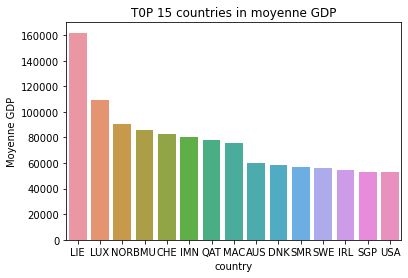

In [251]:
ax = sns.barplot(x='Country Code',y='Moyenne',data=top_15_countries_GDP)
ax.set(xlabel="country")
ax.set(ylabel="Moyenne GDP")
ax.set(title="T0P 15 countries in moyenne GDP")

Selection de 5 pays qui on la meilleur moyenne de PIB/Habitant de 2010 à 2016 pour le scoring

In [252]:
top_5_countries_GDP = Moyenne_ind_GDP.sort_values("Moyenne", ascending=False).head(5)
top_5_countries_GDP

,Moyenne,Country Code
Country Code,,
LIE,161848.656040,LIE
LUX,108906.609516,LUX
NOR,90834.593814,NOR
BMU,86138.406092,BMU
CHE,82883.450322,CHE


- Analise de l'indicateur 'Internet users (per 100 people)'

In [253]:
df_ind_net = df_merge_ind[df_merge_ind['Indicator Name'] == 'Internet users (per 100 people)'][['Country Code',
                '2010', '2011', '2012', '2013', '2014','2016']].T

df_ind_net.columns=df_ind_net.iloc[0]
df_ind_net.columns
df_ind_net=df_ind_net.iloc[1:]
df_ind_net

Country Code,ABW,ALB,AND,ARE,ARG,ARM,ASM,ATG,AUS,AUT,...,URY,USA,VCT,VEN,VIR,WSM,XKX,ZAF,ZMB,ZWE
2010,62.0,45.0,81.0,68.0,45.0,25.0,NaN,47.0,76.0,75.17,...,46.4,71.69,33.7,37.37,31.22,7.0,NaN,24.0,10.0,6.4
2011,69.0,49.0,81.0,78.0,51.0,32.0,NaN,52.0,79.487698,78.739993,...,51.404661,69.729461,36.7,40.22,35.6,11.0,NaN,33.97,11.5,8.4
2012,74.0,54.655959,86.434425,84.999991,55.8,37.5,NaN,58.0,79.0,80.029994,...,54.453769,74.7,40.0,49.050083,40.5479,12.92249,NaN,41.0,13.4682,12.0
2013,78.9,57.2,94.0,88.0,59.9,41.9,NaN,63.4,83.453497,80.6188,...,57.69,71.4,43.5,54.9,45.3,15.3,NaN,46.5,15.4,15.5
2014,83.78,60.1,95.9,90.4,64.7,54.622806,NaN,67.78,84.0,80.995825,...,61.46,73.0,47.4,57.0,50.07,21.2,NaN,49.0,19.0,16.36474
2016,93.542454,66.363445,97.930637,90.600007,70.150764,62.0,NaN,73.0,88.238658,84.323331,...,66.4,76.176737,55.574619,60.0,59.608316,29.41173,NaN,54.0,25.506579,23.119989


Nombre et % de valeur manquante dans df_ind_net

In [254]:
valeur_manquante(df_ind_net).sort_values('nb_manquant', ascending=False)

,nb_manquant,pourcentage
Country Code,,
SXM,6,100.0
XKX,6,100.0
ASM,6,100.0
PLW,6,100.0
CHI,6,100.0
...,...,...
EST,0,0.0
ESP,0,0.0
ECU,0,0.0


Nous allons décider de garder les pays qui ont un nombre de valeur manquante <=4 pour que le remplissage des valeurs soit précis

In [255]:
df_ind_net_clean=Pays_garde(df_ind_net)
df_ind_net_clean.sort_values('nb_manquant', ascending=False)

,2010,2011,2012,2013,2014,2016,nb_manquant
Country Code,,,,,,,
GIB,65.0,65.0,65.017,NaN,NaN,94.444472,2
ABW,62.0,69.0,74.0,78.9,83.78,93.542454,0
PRY,19.8,24.763516,29.34,36.9,43.0,51.349874,0
PRI,45.3,48.0,68.999983,68.99999,76.13386,80.32,0
POL,62.32,61.949999,62.309997,62.8492,66.6,73.3007,0
...,...,...,...,...,...,...,...
ESP,65.8,67.089999,69.81,71.635,76.19,80.561333,0
ECU,29.03,31.366808,35.135146,40.279122,45.590391,54.062925,0
DOM,31.4,38.0,42.32,45.9,49.58,61.32819,0


Supression de la colonne'nb_manquant'

In [256]:
del df_ind_net_clean['nb_manquant']

In [257]:
df_ind_net_clean

,2010,2011,2012,2013,2014,2016
Country Code,,,,,,
ABW,62.0,69.0,74.0,78.9,83.78,93.542454
ALB,45.0,49.0,54.655959,57.2,60.1,66.363445
AND,81.0,81.0,86.434425,94.0,95.9,97.930637
ARE,68.0,78.0,84.999991,88.0,90.4,90.600007
ARG,45.0,51.0,55.8,59.9,64.7,70.150764
...,...,...,...,...,...,...
VIR,31.22,35.6,40.5479,45.3,50.07,59.608316
WSM,7.0,11.0,12.92249,15.3,21.2,29.41173
ZAF,24.0,33.97,41.0,46.5,49.0,54.0


Transposition de la Data df_ind_GDP_clean pour avoir les pays en colonne 

In [258]:
df_ind_net=df_ind_net_clean.T
df_ind_net

Country Code,ABW,ALB,AND,ARE,ARG,ARM,ATG,AUS,AUT,BEL,...,TZA,URY,USA,VCT,VEN,VIR,WSM,ZAF,ZMB,ZWE
2010,62.0,45.0,81.0,68.0,45.0,25.0,47.0,76.0,75.17,75.0,...,2.9,46.4,71.69,33.7,37.37,31.22,7.0,24.0,10.0,6.4
2011,69.0,49.0,81.0,78.0,51.0,32.0,52.0,79.487698,78.739993,81.609996,...,3.2,51.404661,69.729461,36.7,40.22,35.6,11.0,33.97,11.5,8.4
2012,74.0,54.655959,86.434425,84.999991,55.8,37.5,58.0,79.0,80.029994,80.719991,...,3.95,54.453769,74.7,40.0,49.050083,40.5479,12.92249,41.0,13.4682,12.0
2013,78.9,57.2,94.0,88.0,59.9,41.9,63.4,83.453497,80.6188,82.1702,...,4.4,57.69,71.4,43.5,54.9,45.3,15.3,46.5,15.4,15.5
2014,83.78,60.1,95.9,90.4,64.7,54.622806,67.78,84.0,80.995825,85.0,...,7.0,61.46,73.0,47.4,57.0,50.07,21.2,49.0,19.0,16.36474
2016,93.542454,66.363445,97.930637,90.600007,70.150764,62.0,73.0,88.238658,84.323331,86.5165,...,13.0,66.4,76.176737,55.574619,60.0,59.608316,29.41173,54.0,25.506579,23.119989


Remplissage des valeur manquante par la median 

In [259]:
df_ind_NET_remp=remplissage_NAN(df_ind_net)
df_ind_NET_remp

Country Code,ABW,ALB,AND,ARE,ARG,ARM,ATG,AUS,AUT,BEL,...,TZA,URY,USA,VCT,VEN,VIR,WSM,ZAF,ZMB,ZWE
2010,62.000000,45.000000,81.000000,68.000000,45.000000,25.000000,47.00,76.000000,75.170000,75.000000,...,2.90,46.400000,71.690000,33.700000,37.370000,31.220000,7.00000,24.00,10.000000,6.400000
2011,69.000000,49.000000,81.000000,78.000000,51.000000,32.000000,52.00,79.487698,78.739993,81.609996,...,3.20,51.404661,69.729461,36.700000,40.220000,35.600000,11.00000,33.97,11.500000,8.400000
2012,74.000000,54.655959,86.434425,84.999991,55.800000,37.500000,58.00,79.000000,80.029994,80.719991,...,3.95,54.453769,74.700000,40.000000,49.050083,40.547900,12.92249,41.00,13.468200,12.000000
2013,78.900000,57.200000,94.000000,88.000000,59.900000,41.900000,63.40,83.453497,80.618800,82.170200,...,4.40,57.690000,71.400000,43.500000,54.900000,45.300000,15.30000,46.50,15.400000,15.500000
2014,83.780000,60.100000,95.900000,90.400000,64.700000,54.622806,67.78,84.000000,80.995825,85.000000,...,7.00,61.460000,73.000000,47.400000,57.000000,50.070000,21.20000,49.00,19.000000,16.364740
2016,93.542454,66.363445,97.930637,90.600007,70.150764,62.000000,73.00,88.238658,84.323331,86.516500,...,13.00,66.400000,76.176737,55.574619,60.000000,59.608316,29.41173,54.00,25.506579,23.119989


Calcule de la moyenne de l'indicateur 'Internet users (per 100 people)' de 2010 à 2016 pour chaque pays 

In [260]:
Moyenne_ind_NET=Moyenne_data(df_ind_NET_remp)
d=Moyenne_ind_NET.copy()
Moyenne_ind_NET["Country Code"]=d.index
Moyenne_ind_NET

,Moyenne,Country Code
Country Code,,
ABW,76.870409,ABW
ALB,55.386567,ALB
AND,89.377510,AND
ARE,83.333333,ARE
ARG,57.758461,ARG
...,...,...
VIR,43.724369,VIR
WSM,16.139037,WSM
ZAF,41.411667,ZAF


TOP 15 des pays par % d'utilisation d'internet 

In [261]:
top_15_countries_NET=Moyenne_ind_NET.sort_values("Moyenne", ascending=False).head(15)
top_15_countries_NET

,Moyenne,Country Code
Country Code,,
ISL,96.227717,ISL
NOR,95.030261,NOR
LUX,93.090035,LUX
DNK,93.062918,DNK
SWE,92.460067,SWE
BMU,92.324217,BMU
NLD,91.839002,NLD
LIE,90.251934,LIE
AND,89.377510,AND


Diagramme en baton du TOP 15 des pays % d'utilisation internet 

[Text(0.5, 1.0, 'TOP 15 countries in moyenne NET')]

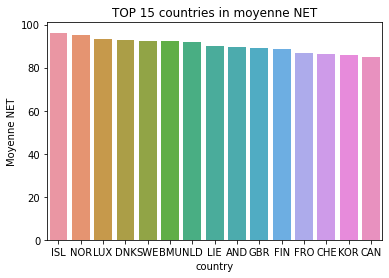

In [262]:
ax = sns.barplot(x='Country Code',y='Moyenne',data=top_15_countries_NET)
ax.set(xlabel="country")
ax.set(ylabel="Moyenne NET")
ax.set(title="TOP 15 countries in moyenne NET")

Selection de 5 pays qui on la meilleur moyenne de PIB/Habitant de 2010 à 2016 pour le scoring

In [263]:
top_5_countries_NET = Moyenne_ind_NET.sort_values("Moyenne", ascending=False).head(5)
top_5_countries_NET

,Moyenne,Country Code
Country Code,,
ISL,96.227717,ISL
NOR,95.030261,NOR
LUX,93.090035,LUX
DNK,93.062918,DNK
SWE,92.460067,SWE


Selection des 5 pays qui ont la meilleur moyenne en % d'utilisation d'internet 

- Anayse de l'indicateur 'Population growth (annual %)'

In [264]:
df_ind_grow = df_merge_ind[df_merge_ind['Indicator Name'] == 'Population growth (annual %)'][['Country Code',
                '2010', '2011', '2012', '2013', '2014','2015', '2016']].T

df_ind_grow.columns=df_ind_grow.iloc[0]
df_ind_grow.columns
df_ind_grow=df_ind_grow.iloc[1:]
df_ind_grow

Country Code,ABW,ALB,AND,ARE,ARG,ARM,ASM,ATG,AUS,AUT,...,URY,USA,VCT,VEN,VIR,WSM,XKX,ZAF,ZMB,ZWE
2010,0.21268,-0.496462,-0.015393,7.587098,1.035037,-0.391024,-1.054862,1.147472,1.55549,0.240394,...,0.34614,0.836422,0.056733,1.529865,-0.413197,0.743338,0.803249,1.429604,2.883152,1.976756
2011,0.376985,-0.269017,-0.829969,4.7437,1.04486,-0.060144,-0.571394,1.111473,1.389527,0.337081,...,0.331626,0.745614,0.023782,1.48831,-0.455552,0.781024,0.859067,1.460296,2.950426,2.109672
2012,0.512145,-0.165151,-1.588653,2.594796,1.050376,0.220269,-0.162822,1.099255,1.722895,0.455937,...,0.328881,0.74642,-0.01189,1.44819,-0.482331,0.811449,0.789727,1.491203,3.005133,2.228306
2013,0.592914,-0.183211,-2.013314,1.181805,1.047277,0.401252,0.13932,1.076058,1.697473,0.584104,...,0.330004,0.700262,-0.007318,1.410957,-0.512353,0.822742,1.041533,1.522336,3.036918,2.309366
2014,0.587492,-0.207047,-1.956178,0.714763,1.032709,0.438332,0.234776,1.068648,1.474288,0.730867,...,0.338072,0.743124,0.03384,1.377539,-0.542827,0.800428,-0.126169,1.553706,3.040211,2.344799
2015,0.524658,-0.291206,-1.537836,0.915608,1.009855,0.368528,0.180222,1.054346,1.391107,1.066623,...,0.350484,0.729732,0.089575,1.346708,-0.573785,0.761047,-1.103886,1.585325,3.024123,2.345643
2016,0.459929,-0.15988,-0.944017,1.251759,0.984742,0.269302,0.111575,1.035422,1.410064,1.314007,...,0.362269,0.692801,0.171613,1.317057,-0.603319,0.702526,0.796024,1.617203,3.002816,2.33607


Nombre et % de valeur manquante dans df_ind_grow

In [265]:
valeur_manquante(df_ind_grow).sort_values('nb_manquant', ascending=False)

,nb_manquant,pourcentage
Country Code,,
SXM,3,42.857143
HRV,1,14.285714
ABW,0,0.000000
MYS,0,0.000000
NER,0,0.000000
...,...,...
ESP,0,0.000000
ECU,0,0.000000
DOM,0,0.000000


Nous constatons que df_ind_grow est bien remplie avec SXM pour 3 valeur manquante et HRV pour 1 valeur manquante donc nous pouvons passer directement au remplissage

In [266]:
df_ind_GROW_remp=remplissage_NAN(df_ind_grow)
df_ind_GROW_remp

Country Code,ABW,ALB,AND,ARE,ARG,ARM,ASM,ATG,AUS,AUT,...,URY,USA,VCT,VEN,VIR,WSM,XKX,ZAF,ZMB,ZWE
2010,0.212680,-0.496462,-0.015393,7.587098,1.035037,-0.391024,-1.054862,1.147472,1.555490,0.240394,...,0.346140,0.836422,0.056733,1.529865,-0.413197,0.743338,0.803249,1.429604,2.883152,1.976756
2011,0.376985,-0.269017,-0.829969,4.743700,1.044860,-0.060144,-0.571394,1.111473,1.389527,0.337081,...,0.331626,0.745614,0.023782,1.488310,-0.455552,0.781024,0.859067,1.460296,2.950426,2.109672
2012,0.512145,-0.165151,-1.588653,2.594796,1.050376,0.220269,-0.162822,1.099255,1.722895,0.455937,...,0.328881,0.746420,-0.011890,1.448190,-0.482331,0.811449,0.789727,1.491203,3.005133,2.228306
2013,0.592914,-0.183211,-2.013314,1.181805,1.047277,0.401252,0.139320,1.076058,1.697473,0.584104,...,0.330004,0.700262,-0.007318,1.410957,-0.512353,0.822742,1.041533,1.522336,3.036918,2.309366
2014,0.587492,-0.207047,-1.956178,0.714763,1.032709,0.438332,0.234776,1.068648,1.474288,0.730867,...,0.338072,0.743124,0.033840,1.377539,-0.542827,0.800428,-0.126169,1.553706,3.040211,2.344799
2015,0.524658,-0.291206,-1.537836,0.915608,1.009855,0.368528,0.180222,1.054346,1.391107,1.066623,...,0.350484,0.729732,0.089575,1.346708,-0.573785,0.761047,-1.103886,1.585325,3.024123,2.345643
2016,0.459929,-0.159880,-0.944017,1.251759,0.984742,0.269302,0.111575,1.035422,1.410064,1.314007,...,0.362269,0.692801,0.171613,1.317057,-0.603319,0.702526,0.796024,1.617203,3.002816,2.336070


In [267]:
Moyenne_ind_GROW=Moyenne_data(df_ind_GROW_remp)
d=Moyenne_ind_GROW.copy()
Moyenne_ind_GROW["Country Code"]=d.index
Moyenne_ind_GROW

,Moyenne,Country Code
Country Code,,
ABW,0.466686,ABW
ALB,-0.253139,ALB
AND,-1.269337,AND
ARE,2.712790,ARE
ARG,1.029265,ARG
...,...,...
WSM,0.774651,WSM
XKX,0.437078,XKX
ZAF,1.522810,ZAF


TOP 15 des pays par moyenne de la croissance de la population 

In [268]:
top_15_countries_GROW=Moyenne_ind_GROW.sort_values("Moyenne", ascending=False).head(15)
top_15_countries_GROW

,Moyenne,Country Code
Country Code,,
QAT,6.851502,QAT
OMN,6.120074,OMN
KWT,5.185630,KWT
NER,3.827682,NER
GAB,3.161405,GAB
TZA,3.121573,TZA
GMB,3.111240,GMB
ZMB,2.991826,ZMB
SEN,2.933252,SEN


Diagramme en baton du TOP 15 croissance de la population

[Text(0.5, 1.0, 'TOP 15 countries in moyenne GROW')]

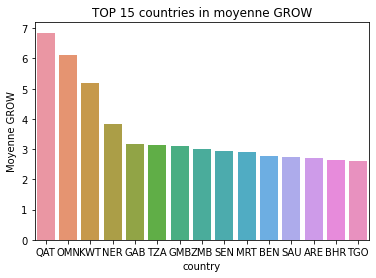

In [269]:
ax = sns.barplot(x='Country Code',y='Moyenne',data=top_15_countries_GROW)
ax.set(xlabel="country")
ax.set(ylabel="Moyenne GROW")
ax.set(title="TOP 15 countries in moyenne GROW")

Selection des 5 pays qui on la meilleur moyenne pour croissance de la population pour le scoring 

In [270]:
top_5_countries_GROW = Moyenne_ind_GROW.sort_values("Moyenne", ascending=False).head(5)
top_5_countries_GROW

,Moyenne,Country Code
Country Code,,
QAT,6.851502,QAT
OMN,6.120074,OMN
KWT,5.185630,KWT
NER,3.827682,NER
GAB,3.161405,GAB


**Etape 4 : Création des Scores**

- Réalisation d'un socring qui attribut une note sur 3 des pays qui appatiennent au top 5 des 3 indicateurs

In [271]:
df_all= pd.concat([top_5_countries_GDP,top_5_countries_NET,top_5_countries_GROW])
df_all

,Moyenne,Country Code
Country Code,,
LIE,161848.656040,LIE
LUX,108906.609516,LUX
NOR,90834.593814,NOR
BMU,86138.406092,BMU
CHE,82883.450322,CHE
ISL,96.227717,ISL
NOR,95.030261,NOR
LUX,93.090035,LUX
DNK,93.062918,DNK


Suppression de la colonne Moyenne

In [272]:
del df_all['Moyenne']

Création d'une liste unique de pays 

In [273]:
df_pays_score=df_all.drop_duplicates()
liste_pays=list(df_pays_score['Country Code'])
liste_pays

['LIE',
 'LUX',
 'NOR',
 'BMU',
 'CHE',
 'ISL',
 'DNK',
 'SWE',
 'QAT',
 'OMN',
 'KWT',
 'NER',
 'GAB']

Creation d'une Dataframe df_score_pays parfaitement indexée

In [274]:
df_score_pays = df_ed_stat_country[ df_ed_stat_country['Country Code'].isin(liste_pays)]
df_score_pays = df_score_pays[['Country Code']] 
df_score_pays.reset_index(drop=True, inplace=True)
df_score_pays

,Country Code
0,BMU
1,CHE
2,DNK
3,GAB
4,ISL
5,KWT
6,LIE
7,LUX
8,NER
9,NOR


Création des colonnes Score pour les trois indicateurs initialisés à 0

In [275]:
df_score_pays['Score GDP']=0
df_score_pays['Score NET']=0
df_score_pays['Score GROW']=0

In [276]:
df_score_pays

,Country Code,Score GDP,Score NET,Score GROW
0,BMU,0,0,0
1,CHE,0,0,0
2,DNK,0,0,0
3,GAB,0,0,0
4,ISL,0,0,0
5,KWT,0,0,0
6,LIE,0,0,0
7,LUX,0,0,0
8,NER,0,0,0
9,NOR,0,0,0


Indexation par Country Code

In [277]:
df_score_pays.index = df_score_pays['Country Code']
df_score_pays

,Country Code,Score GDP,Score NET,Score GROW
Country Code,,,,
BMU,BMU,0,0,0
CHE,CHE,0,0,0
DNK,DNK,0,0,0
GAB,GAB,0,0,0
ISL,ISL,0,0,0
KWT,KWT,0,0,0
LIE,LIE,0,0,0
LUX,LUX,0,0,0
NER,NER,0,0,0


Boucle qui ajoute +1 si un pays est dans le top 5

In [278]:
for country in df_score_pays.index: # je parcours l'ensemble des pays de la liste df_score_countries
    if country in top_5_countries_GDP.index:  # Vérification si le pays est dans la liste des pays Top 5
        score=df_score_pays["Score GDP"][country]
        df_score_pays["Score GDP"][country]=df_score_pays["Score GDP"][country]+1
    if country in top_5_countries_NET.index:  # Vérification si le pays est dans la liste des pays Top 5
        score=df_score_pays["Score NET"][country]
        df_score_pays["Score NET"][country]=df_score_pays["Score NET"][country]+1
    if country in top_5_countries_GROW.index:  # Vérification si le pays est dans la liste des pays Top 5
        score=df_score_pays["Score GROW"][country]
        df_score_pays["Score GROW"][country]=df_score_pays["Score GROW"][country]+1
    
df_score_pays

,Country Code,Score GDP,Score NET,Score GROW
Country Code,,,,
BMU,BMU,1,0,0
CHE,CHE,1,0,0
DNK,DNK,0,1,0
GAB,GAB,0,0,1
ISL,ISL,0,1,0
KWT,KWT,0,0,1
LIE,LIE,1,0,0
LUX,LUX,1,1,0
NER,NER,0,0,1


Création de la colonne Note score qui est une note sur 3 et classement des pays par la meilleur note 

In [279]:
df_score_pays['Note Score'] = (df_score_pays['Score GDP'] + df_score_pays['Score NET'] + df_score_pays['Score GROW'])/ 3
df_score_pays.sort_values("Note Score", ascending=False).head(15)

,Country Code,Score GDP,Score NET,Score GROW,Note Score
Country Code,,,,,
LUX,LUX,1,1,0,0.666667
NOR,NOR,1,1,0,0.666667
BMU,BMU,1,0,0,0.333333
CHE,CHE,1,0,0,0.333333
DNK,DNK,0,1,0,0.333333
GAB,GAB,0,0,1,0.333333
ISL,ISL,0,1,0,0.333333
KWT,KWT,0,0,1,0.333333
LIE,LIE,1,0,0,0.333333
